# GEOTRACES 
found online from https://geotraces.webodv.awi.de/IDP2021_v2%3EGEOTRACES_IDP2021_Seawater_Discrete_Sample_Data_v2/service/DataExploration

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from cartopy import crs, feature
import numpy as np
import cmocean as cm

In [2]:
grid = xr.open_dataset('/data1/parker/LO_data/grids/cas6/grid.nc')
data = xr.open_dataset("/data1/bbeutel/LO_user/tracers/data_from_GEOTRACES_IDP2021_Seawater_Discrete_Sample_Data_v2.nc")

In [3]:
#stations with temperature and salinity data: 
st = []
for i in data.N_STATIONS:
    if np.max(data.CTDTMP_T_VALUE_SENSOR[i,:]).values > 0 :
        if np.max(data.SALINITY_D_CONC_BOTTLE[i,:]).values > 0 :
            # print(i.values)
            st = np.append(st,int(i.values))

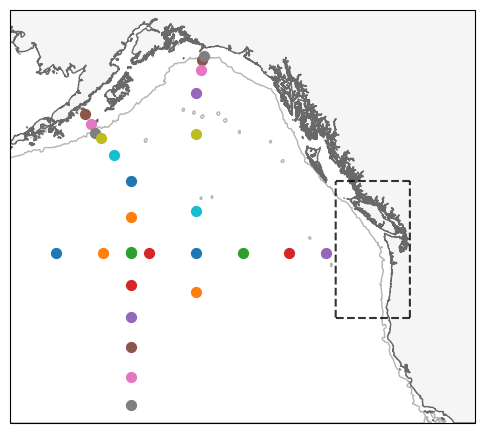

In [9]:
xlim, ylim = [-165, -115], [33, 62]
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

# Draw coastline
ax.add_feature(feature.GSHHSFeature('high', edgecolor='dimgray', facecolor='whitesmoke', zorder=2))
# Draw 1000 m isobar
ax.add_feature(feature.NaturalEarthFeature(name='bathymetry_J_1000', scale='10m', category='physical', edgecolor='dimgray', facecolor='white', alpha=0.5))

# Draw model box
ax.plot(grid['lon_rho'][ :,  0], grid['lat_rho'][ :,  0], 'k--', alpha=0.8, zorder=3, transform=crs.PlateCarree())
ax.plot(grid['lon_rho'][ :, -1], grid['lat_rho'][ :, -1], 'k--', alpha=0.8, zorder=3, transform=crs.PlateCarree())
ax.plot(grid['lon_rho'][ 0,  :], grid['lat_rho'][ 0,  :], 'k--', alpha=0.8, zorder=3, transform=crs.PlateCarree())
ax.plot(grid['lon_rho'][-1,  :], grid['lat_rho'][-1,  :], 'k--', alpha=0.8, zorder=3, transform=crs.PlateCarree())

# Draw locations of GEOTRACES measurements
for i in st:
    ax.scatter(data.longitude[int(i)]-360,data.latitude[int(i)], s=50, transform=crs.PlateCarree(), zorder=4, label="station {}".format(i))
# ax.legend()

# plt.savefig("GEOTRACESmap.png")